In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

import pandas as pd

## Data Scraping

Gathering info for one player

In [2]:
wta_players = requests.get("https://www.wtatennis.com/players/316956/jessica-pegula")
soup = BeautifulSoup(wta_players.text, 'lxml')


In [3]:
player_name = soup.find('span', class_= 'profile-header-info__firstname').get_text().strip( ) +" "+  soup.find('span', class_='profile-header-info__surname').get_text().strip( ).removesuffix('TopCourt Logo').strip( )

player_ranking = int(soup.find('span', class_='profile-header-image-col__rank-pos js-profile-header-update-label')['data-single'])


player_info = soup.findAll('div', class_='profile-header-info__detail-stat--small')
gen_info = []
for info in player_info:
    info = info.get_text().strip( )
    gen_info.append(info)

try:
    gen_info[2] = datetime.strptime(gen_info[2], '%b %d %Y').date()
    today = date.today()
    gen_info[2] = relativedelta(today, gen_info[2]).years
except:
    gen_info.insert(2, "No data available")



player_stats = soup.findAll('div', class_='profile-header-stats__value js-profile-header-stat-count-up')
stats = []
for stat in player_stats:
    stat = int(stat['data-single'])
    stats.append(stat)



player_wlsingles = soup.findAll('span', class_='js-profile-header-stat-count-up')
ratio_values = []
for num in player_wlsingles:
    num = num['data-single']
    ratio_values.append(num)
currentyr_wlsingles ="'" + ratio_values[0] + "/"+ ratio_values[1]
career_wlsingles = "'" + ratio_values[2] + '/' + ratio_values[-1]

try:
    insta = soup.find('a', class_='profile-header-image-col__social-link profile-header-image-col__social-link--instagram')['href']
except:
    insta = "No link available"

In [4]:
player_bio = {
    "Name": player_name,
    "Ranking": player_ranking,
    "Height": gen_info[0],
    "Plays": gen_info[1],
    "Age": gen_info[2],
    "Birthplace": gen_info[-1],
    "Current Ranking": stats[0],
    "Singles Titles YTD": stats[1],
    "Prize Money YTD": stats[2],
    "W/L Singles YTD": currentyr_wlsingles,
    "Career High": stats[3],
    "Career Singles Titles": stats[4],
    "Career Prize Money": stats[-1],
    "Career W/L Singles": career_wlsingles,
    "Instagram": insta
}
print(player_bio)

{'Name': 'Jessica Pegula', 'Ranking': 3, 'Height': '1.70m', 'Plays': 'Right-Handed', 'Age': 29, 'Birthplace': 'Buffalo, NY, USA', 'Current Ranking': 3, 'Singles Titles YTD': 0, 'Prize Money YTD': 2198253, 'W/L Singles YTD': "'22/6", 'Career High': 3, 'Career Singles Titles': 2, 'Career Prize Money': 8613609, 'Career W/L Singles': "'358/220", 'Instagram': 'https://www.instagram.com/jpegula/'}


Creating a list of players' links

In [5]:
chrome_options = Options()
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--incognito')
chrome_options.add_argument('--headless')
driver = webdriver.Chrome("C:\chromedriver.exe", options=chrome_options)
driver.get('https://www.wtatennis.com/rankings/singles')
time.sleep(2)

scroll_pause_time = 0.5
screen_height = driver.execute_script("return window.screen.height;")
i = 1

while True:
    driver.execute_script(f"window.scrollTo(0, {screen_height}*{i});")
    i += 1
    time.sleep(scroll_pause_time)
    page_height = driver.execute_script("return document.body.scrollHeight")
    if screen_height*i > page_height:
        break

top100_players = []
players = driver.find_elements(By.TAG_NAME, 'a')
for player in players:
    player_link = player.get_attribute('href')
    if 'https://www.wtatennis.com/players/' in player_link and player_link not in top100_players and len(top100_players) < 100:
        top100_players.append(player_link)


driver.quit()

C:\Users\Hannifa\AppData\Local\Temp\ipykernel_14440\3700560601.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\chromedriver.exe", options=chrome_options)


Adding it all together: gathering info on all players

In [9]:
player_profile = []
for link in top100_players:
    wta_player_link = requests.get(link)
    final_soup = BeautifulSoup(wta_player_link.text, "lxml")
    

    player_name = final_soup.find('span', class_= 'profile-header-info__firstname').get_text().strip( ) +" "+  final_soup.find('span', class_='profile-header-info__surname').get_text().strip( ).removesuffix('TopCourt Logo').strip( )
    player_ranking = int(final_soup.find('span', class_='profile-header-image-col__rank-pos js-profile-header-update-label')['data-single'])


    player_info = final_soup.findAll('div', class_='profile-header-info__detail-stat--small')
    gen_info = []
    for info in player_info:
        info = info.get_text().strip( )
        gen_info.append(info)

    try:
        gen_info[2] = datetime.strptime(gen_info[2], '%b %d %Y').date()
        today = date.today()
        gen_info[2] = relativedelta(today, gen_info[2]).years
    except:
        gen_info.insert(2, "No data available")



    player_stats = final_soup.findAll('div', class_='profile-header-stats__value js-profile-header-stat-count-up')
    stats = []
    for stat in player_stats:
        stat = int(stat['data-single'])
        stats.append(stat)



    player_wlsingles = final_soup.findAll('span', class_='js-profile-header-stat-count-up')
    ratio_values = []
    for num in player_wlsingles:
        num = num['data-single']
        ratio_values.append(num)
    currentyr_wsingles = ratio_values[0]
    currentyr_lsingles = ratio_values[1]
    career_wsingles = ratio_values[2]
    career_lsingles = ratio_values[-1]

    try:
        insta = final_soup.find('a', class_='profile-header-image-col__social-link profile-header-image-col__social-link--instagram')['href']
    except:
        insta = "No link available"


    player_bio = {
        "Name": player_name,
        "Ranking": player_ranking,
        "Height": gen_info[0],
        "Plays": gen_info[1],
        "Age": gen_info[2],
        "Birthplace": gen_info[-1],
        "Current Ranking": stats[0],
        "Singles Titles YTD": stats[1],
        "Prize Money YTD": stats[2],
        "YTD Singles Wins": currentyr_wsingles,
        "YTD Singles Losses": currentyr_lsingles,
        "Career High": stats[3],
        "Career Singles Titles": stats[4],
        "Career Prize Money": stats[-1],
        "Career Singles Wins": career_wsingles,
        "Career Singles Losses": career_lsingles,
        "Instagram": insta
    }

    player_profile.append(player_bio)


Saving to DataFrame

In [ ]:
df = pd.DataFrame(player_profile)
df.to_csv("WTA_top100_players.csv")

## Data Analysis

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

wta = pd.read_csv(".\\WTA_top100_players.csv")
wta


,Name,Ranking,Height,Plays,Age,Birthplace,Current Ranking,Singles Titles YTD,Prize Money YTD,YTD Singles Wins,YTD Singles Losses,Career High,Career Singles Titles,Career Prize Money,Career Singles Wins,Career Singles Losses,Instagram
0,Iga Swiatek,1,1.76m,Right-Handed,21,"Warsaw, Poland",1,1,"$1,361,428.00",17,5,1,12,"$16,096,505.00",230,60,https://www.instagram.com/iga.swiatek/
1,Aryna Sabalenka,2,1.82m,Right-Handed,24,"Minsk, Belarus",2,2,"$3,118,046.00",20,3,2,12,"$15,292,956.00",325,163,https://www.instagram.com/sabalenka_aryna/
2,Jessica Pegula,3,1.70m,Right-Handed,29,"Buffalo, NY, USA",3,0,"$2,198,253.00",22,6,3,2,"$8,613,609.00",358,220,https://www.instagram.com/jpegula/
3,Caroline Garcia,4,1.77m,Right-Handed,29,"Saint-Germain-en-Laye, France",4,0,"$749,221.00",17,8,4,11,"$15,813,362.00",428,321,https://www.instagram.com/carogarcia/
4,Ons Jabeur,5,1.67m,Right-Handed,28,"Ksar El Hellar, Tunisia",5,0,"$250,091.00",4,4,2,3,"$9,434,834.00",397,219,https://www.instagram.com/onsjabeur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Anna Karolina Schmiedlova,96,1.76m,Right-Handed,28,"Kosice, Slovakia",96,0,"$156,917.00",8,8,26,3,"$3,639,837.00",375,268,https://www.instagram.com/akschmiedlova/
96,Alison Van Uytvanck,97,1.73m,Right-Handed,29,"Vilvoorde, Belgium",97,0,"$180,656.00",5,4,37,5,"$4,253,618.00",367,257,No link available
97,Magdalena Frech,98,1.71m,Right-Handed,25,"Lodz, Poland",98,0,"$130,547.00",7,11,82,0,"$1,354,760.00",339,235,https://www.instagram.com/magdalenafrech/
98,Oceane Dodin,99,1.83m,Right-Handed,26,"Lille, France",99,0,"$41,987.00",27,5,46,1,"$2,023,689.00",369,234,No link available


In [23]:
wta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   100 non-null    object
 1   Ranking                100 non-null    int64 
 2   Height                 100 non-null    object
 3   Plays                  100 non-null    object
 4   Age                    100 non-null    object
 5   Birthplace             100 non-null    object
 6   Current Ranking        100 non-null    int64 
 7   Singles Titles YTD     100 non-null    int64 
 8   Prize Money YTD        100 non-null    object
 9   YTD Singles Wins       100 non-null    int64 
 10  YTD Singles Losses     100 non-null    int64 
 11  Career High            100 non-null    int64 
 12  Career Singles Titles  100 non-null    int64 
 13  Career Prize Money     100 non-null    object
 14  Career Singles Wins    100 non-null    int64 
 15  Career Singles Losses  1

Converting columns into numeric datatype

In [24]:
#Height column

wta["Height"]= wta["Height"].replace("m", "", regex=True)
wta["Height"]= wta["Height"].replace("-", "", regex=True)
wta.rename(columns={"Height": "Height (m)"}, inplace=True)
wta["Height (m)"] = pd.to_numeric(wta["Height (m)"], errors="coerce", downcast="float")
wta

,Name,Ranking,Height (m),Plays,Age,Birthplace,Current Ranking,Singles Titles YTD,Prize Money YTD,YTD Singles Wins,YTD Singles Losses,Career High,Career Singles Titles,Career Prize Money,Career Singles Wins,Career Singles Losses,Instagram
0,Iga Swiatek,1,1.76,Right-Handed,21,"Warsaw, Poland",1,1,"$1,361,428.00",17,5,1,12,"$16,096,505.00",230,60,https://www.instagram.com/iga.swiatek/
1,Aryna Sabalenka,2,1.82,Right-Handed,24,"Minsk, Belarus",2,2,"$3,118,046.00",20,3,2,12,"$15,292,956.00",325,163,https://www.instagram.com/sabalenka_aryna/
2,Jessica Pegula,3,1.70,Right-Handed,29,"Buffalo, NY, USA",3,0,"$2,198,253.00",22,6,3,2,"$8,613,609.00",358,220,https://www.instagram.com/jpegula/
3,Caroline Garcia,4,1.77,Right-Handed,29,"Saint-Germain-en-Laye, France",4,0,"$749,221.00",17,8,4,11,"$15,813,362.00",428,321,https://www.instagram.com/carogarcia/
4,Ons Jabeur,5,1.67,Right-Handed,28,"Ksar El Hellar, Tunisia",5,0,"$250,091.00",4,4,2,3,"$9,434,834.00",397,219,https://www.instagram.com/onsjabeur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Anna Karolina Schmiedlova,96,1.76,Right-Handed,28,"Kosice, Slovakia",96,0,"$156,917.00",8,8,26,3,"$3,639,837.00",375,268,https://www.instagram.com/akschmiedlova/
96,Alison Van Uytvanck,97,1.73,Right-Handed,29,"Vilvoorde, Belgium",97,0,"$180,656.00",5,4,37,5,"$4,253,618.00",367,257,No link available
97,Magdalena Frech,98,1.71,Right-Handed,25,"Lodz, Poland",98,0,"$130,547.00",7,11,82,0,"$1,354,760.00",339,235,https://www.instagram.com/magdalenafrech/
98,Oceane Dodin,99,1.83,Right-Handed,26,"Lille, France",99,0,"$41,987.00",27,5,46,1,"$2,023,689.00",369,234,No link available


In [25]:
# Age column

import numpy as np

wta["Age"] = wta["Age"].replace("No data available", np.nan)
wta["Age"] = pd.to_numeric(wta["Age"], errors="coerce", downcast="integer")
wta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   100 non-null    object 
 1   Ranking                100 non-null    int64  
 2   Height (m)             99 non-null     float32
 3   Plays                  100 non-null    object 
 4   Age                    97 non-null     float64
 5   Birthplace             100 non-null    object 
 6   Current Ranking        100 non-null    int64  
 7   Singles Titles YTD     100 non-null    int64  
 8   Prize Money YTD        100 non-null    object 
 9   YTD Singles Wins       100 non-null    int64  
 10  YTD Singles Losses     100 non-null    int64  
 11  Career High            100 non-null    int64  
 12  Career Singles Titles  100 non-null    int64  
 13  Career Prize Money     100 non-null    object 
 14  Career Singles Wins    100 non-null    int64  
 15  Career 

In [26]:
# Prize Money columns

prize_cols = wta.filter(like="Prize").columns

for column in prize_cols:
    wta[column] = wta[column].replace("[\$,]", "", regex=True).astype(float)

wta.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   100 non-null    object 
 1   Ranking                100 non-null    int64  
 2   Height (m)             99 non-null     float32
 3   Plays                  100 non-null    object 
 4   Age                    97 non-null     float64
 5   Birthplace             100 non-null    object 
 6   Current Ranking        100 non-null    int64  
 7   Singles Titles YTD     100 non-null    int64  
 8   Prize Money YTD        100 non-null    float64
 9   YTD Singles Wins       100 non-null    int64  
 10  YTD Singles Losses     100 non-null    int64  
 11  Career High            100 non-null    int64  
 12  Career Singles Titles  100 non-null    int64  
 13  Career Prize Money     100 non-null    float64
 14  Career Singles Wins    100 non-null    int64  
 15  Career 

_Q. Who are the top 10 paid tennis players?_

In [27]:
top_paid = wta.sort_values(by="Career Prize Money", ascending=False).filter(["Name","Career Prize Money"]).iloc[0:10,]
top_paid

,Name,Career Prize Money
25,Simona Halep,40203437.0
9,Petra Kvitova,36564924.0
17,Victoria Azarenka,35704305.0
15,Karolina Pliskova,24940592.0
49,Sloane Stephens,17364713.0
0,Iga Swiatek,16096505.0
3,Caroline Garcia,15813362.0
21,Madison Keys,15777607.0
1,Aryna Sabalenka,15292956.0
77,Sara Errani,13927563.0


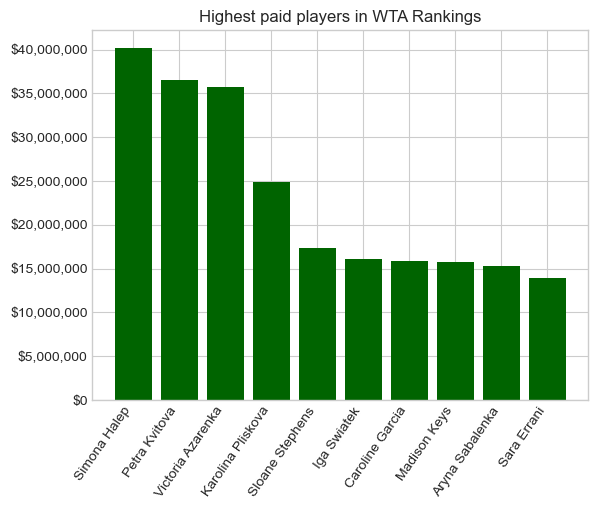

In [90]:
fig, ax=plt.subplots()

ax.bar(top_paid["Name"], top_paid["Career Prize Money"], color="darkgreen")
ax.set_title("Highest paid players in WTA Rankings")

ax.set_xticks(top_paid["Name"])
ax.set_xticklabels(top_paid["Name"], rotation=55, ha="right")

ax.yaxis.set_major_formatter("${x:,.0f}")

In [118]:
top_year_paid = wta.sort_values(by="Prize Money YTD", ascending=False).filter(["Name","Prize Money YTD"]).iloc[0:10,]
top_year_paid

,Name,Prize Money YTD
6,Elena Rybakina,3178819.0
1,Aryna Sabalenka,3118046.0
2,Jessica Pegula,2198253.0
9,Petra Kvitova,1801273.0
11,Barbora Krejcikova,1377461.0
0,Iga Swiatek,1361428.0
18,Magda Linette,1037246.0
5,Coco Gauff,1006379.0
8,Maria Sakkari,1005872.0
21,Madison Keys,817195.0


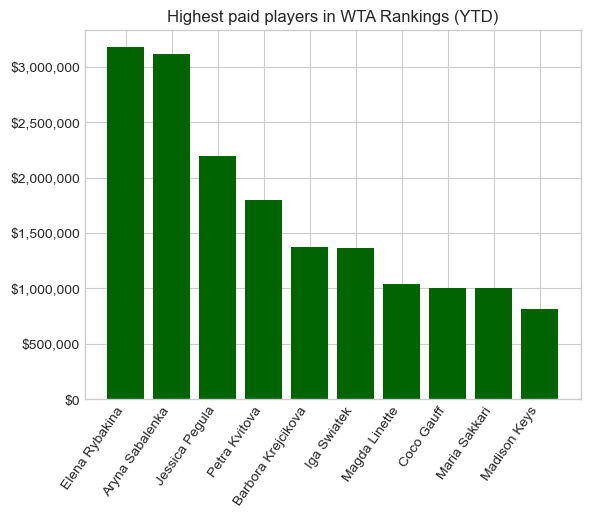

In [119]:
fig, ax=plt.subplots()

ax.bar(top_year_paid["Name"], top_year_paid["Prize Money YTD"], color="darkgreen")
ax.set_title("Highest paid players in WTA Rankings (YTD)")

ax.set_xticks(top_year_paid["Name"])
ax.set_xticklabels(top_year_paid["Name"], rotation=55, ha="right")

ax.yaxis.set_major_formatter("${x:,.0f}")

_Q. How many players in top 100 have had a No.1 career high ranking?_

In [29]:
career_high = wta.where(wta["Career High"]==1).dropna().filter(["Name", "Ranking", "Career High"])
career_high

,Name,Ranking,Career High
0,Iga Swiatek,1.0,1.0
15,Karolina Pliskova,16.0,1.0
17,Victoria Azarenka,18.0,1.0
25,Simona Halep,26.0,1.0


_Q. What is the age distribution of players?_

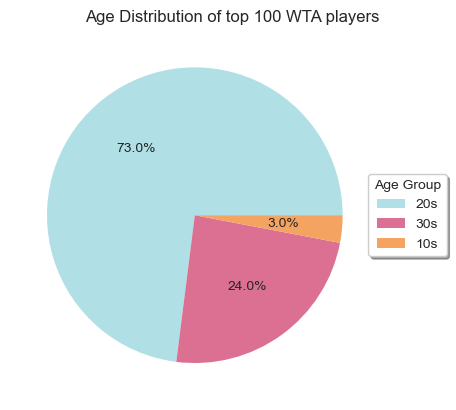

In [109]:
#creating a condition: 10s, 20s, 30s
age_cond = []

for line in range(len(wta)):
    if wta.iloc[line,4] < 20:
        age_cond.append("10s")
    elif 20<= wta.iloc[line,4] < 30:
        age_cond.append("20s")
    else:
        age_cond.append("30s")  

wta["Age Groups"] = age_cond
age_groups = wta["Age Groups"].value_counts()
age_groups


plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots()

colors = ["powderblue", "palevioletred", "sandybrown"]
ax.pie(age_groups, labels= age_groups.index, colors= colors, autopct="%.1f%%", labeldistance=None)
ax.set_title("Age Distribution of top 100 WTA players", loc="right")
ax.legend(title= "Age Group", loc="center right", bbox_to_anchor= (1,0,0.2,1), frameon=True, shadow=True)

In [98]:
wta["Age"].describe()

count    97.000000
mean     26.505155
std       4.260095
min      17.000000
25%      23.000000
50%      26.000000
75%      29.000000
max      37.000000
Name: Age, dtype: float64

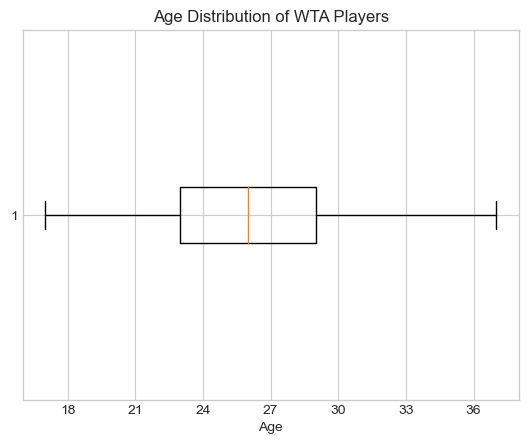

In [116]:
import matplotlib.ticker as mticker

age_dist = wta["Age"].dropna()

fig, ax= plt.subplots()

ax.boxplot(age_dist, vert=False)
ax.set_title("Age Distribution of WTA Players")
ax.set_xlabel("Age")

ax.xaxis.set_major_locator(mticker.MultipleLocator(base=3))

_Q. Is there a correlation between ranking and wins:losses ratio?_

In [31]:
wta_corr = wta.iloc[:,[0,1,9,10,14,15]]
wta_corr["Career W/L"] = wta_corr["Career Singles Wins"]/wta_corr["Career Singles Losses"]
wta_corr["YTD W/L"] = wta_corr["YTD Singles Wins"]/wta_corr["YTD Singles Losses"]
wta_corr


C:\Users\Hannifa\AppData\Local\Temp\ipykernel_16880\992173093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wta_corr["Career W/L"] = wta_corr["Career Singles Wins"]/wta_corr["Career Singles Losses"]
C:\Users\Hannifa\AppData\Local\Temp\ipykernel_16880\992173093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wta_corr["YTD W/L"] = wta_corr["YTD Singles Wins"]/wta_corr["YTD Singles Losses"]


,Name,Ranking,YTD Singles Wins,YTD Singles Losses,Career Singles Wins,Career Singles Losses,Career W/L,YTD W/L
0,Iga Swiatek,1,17,5,230,60,3.833333,3.400000
1,Aryna Sabalenka,2,20,3,325,163,1.993865,6.666667
2,Jessica Pegula,3,22,6,358,220,1.627273,3.666667
3,Caroline Garcia,4,17,8,428,321,1.333333,2.125000
4,Ons Jabeur,5,4,4,397,219,1.812785,1.000000
...,...,...,...,...,...,...,...,...
95,Anna Karolina Schmiedlova,96,8,8,375,268,1.399254,1.000000
96,Alison Van Uytvanck,97,5,4,367,257,1.428016,1.250000
97,Magdalena Frech,98,7,11,339,235,1.442553,0.636364
98,Oceane Dodin,99,27,5,369,234,1.576923,5.400000


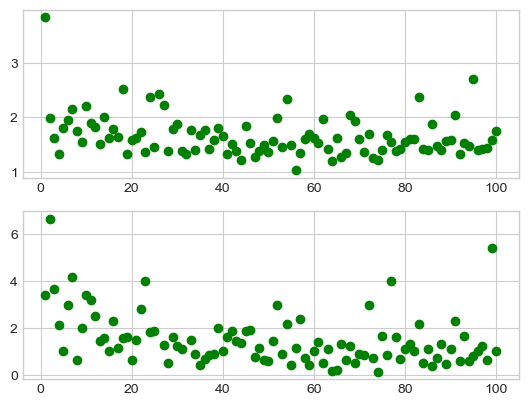

In [32]:
plt.style.use("seaborn-whitegrid")
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(wta_corr["Ranking"], wta_corr["Career W/L"], color="g")
ax2.scatter(wta_corr["Ranking"], wta_corr["YTD W/L"], color="g")


In [33]:

wta_corr["Ranking"].corr(wta_corr["Career W/L"])

#weak negative linear relationship

-0.2696686652372159

In [34]:
wta_corr["Ranking"].corr(wta_corr["YTD W/L"])

#weak negative linear relationship

-0.348505824366003

_Q. What are the top countries in WTA Rankings?_

In [120]:
#then do value_counts

wta["Country"]= wta["Birthplace"].str.rsplit(", ", n=1, expand=True).iloc[:,1]
countries = pd.DataFrame(wta["Country"].value_counts())
countries= countries.nlargest(10, columns="Country")
countries

,Country
USA,14
Russia,10
Czech Republic,8
Italy,6
China,5
Ukraine,5
Romania,4
Croatia,4
Poland,3
Hungary,3


Text(0, 0.5, 'Frequency')

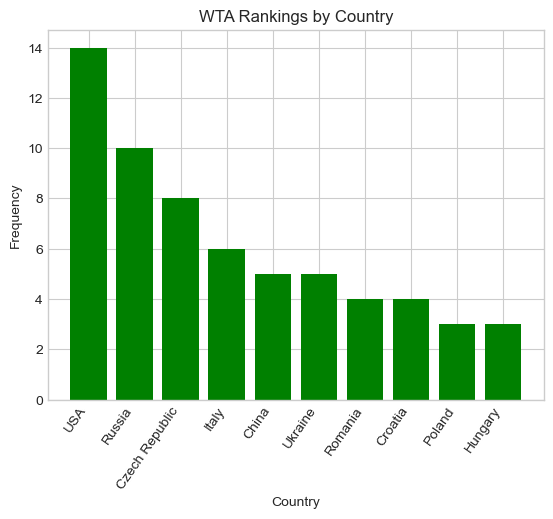

In [79]:
fig, ax=plt.subplots()

ax.bar(countries.index, countries["Country"], color="g")
ax.set_title("WTA Rankings by Country")

ax.set_xticks(countries.index)
ax.set_xticklabels(countries.index, rotation=55, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Frequency")


_Q. Most dominant hand used?_

In [65]:
# do value_counts on Plays column
play_hand = pd.DataFrame(wta["Plays"].value_counts())
play_hand
#then show in pie chart

,Plays
Right-Handed,90
Left-Handed,10


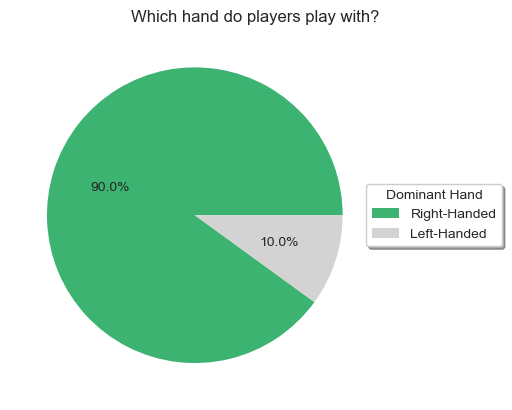

In [91]:
fig, ax = plt.subplots()
colours = ["mediumseagreen", "lightgrey"]
ax.pie(play_hand["Plays"], labels= play_hand.index, colors=colours, autopct="%.1f%%", labeldistance=None)
ax.set_title("Which hand do players play with?", loc="right")
ax.legend(title= "Dominant Hand", loc="center right", bbox_to_anchor= (1,0,0.35,1), frameon=True, shadow=True)